In [43]:
%matplotlib inline


from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score, train_test_split
from numpy import random, float, array
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

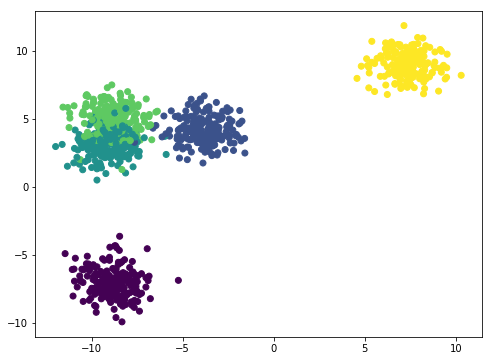

In [44]:
from sklearn.datasets.samples_generator import make_blobs
def blob_classification_data(n_samples,n_features,centroids):
    X, y = make_blobs(n_samples=n_samples, centers=centroids, n_features=n_features)
    df=pd.DataFrame(X,y)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    return df,X, y

df, X, y=blob_classification_data(n_samples=1000,n_features=5,centroids=5)

#### Train Test Split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1221)

### Kmeans

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

def kmeans_seperation(data,cluster_num):
    model = KMeans(n_clusters=cluster_num)
    # Note I'm scaling the data to normalize it! Important for good results.
    model = model.fit(scale(data))
    # We can look at the clusters each data point was assigned to
    clusters=model.labels_
    return clusters


In [47]:
cluster_num=10
clusters=kmeans_seperation(X,10)

### Elbow Method

In [48]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

def plot_elbow(X):
    X_matrix=np.matrix(X)
    K=list(range(2,11))
    y=[]
    for i in K:
        kmeans=KMeans(n_clusters=i, random_state=1, init='k-means++')
        kmeans.fit(X_matrix)
        labels=kmeans.labels_
        y.append(kmeans.inertia_)

    # Create a trace
    trace = go.Scatter(x = K, y = y)

    data = [trace]
    layout = go.Layout(xaxis=dict(title='K',
            titlefont=dict(family='Arial, sans-serif',size=18,color='lightgrey'),
            showticklabels=True,tickangle=45,
            tickfont=dict(family='Old Standard TT, serif',size=14,
                color='black'),exponentformat='e',showexponent='all'),
        yaxis=dict(title='Sums of Squares',
            titlefont=dict(family='Arial, sans-serif',size=18,color='lightgrey'),
            showticklabels=True,tickangle=45,
            tickfont=dict(family='Old Standard TT, serif',size=14,
                color='black'),exponentformat='e',showexponent='all'))

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [49]:
plot_elbow(X)

In [50]:
from sklearn.metrics import silhouette_score 

def plot_silhouette(X):
    X_matrix=X
    K=list(range(2,11))
    ys=[]
    for i in K:
        kmeans=KMeans(n_clusters=i, random_state=1)
        kmeans.fit(X_matrix)
        labels=kmeans.labels_
        ys.append(silhouette_score(X_matrix, labels))

    # Create a trace
    trace = go.Scatter(x = K, y = ys)

    data = [trace]
    layout = go.Layout(
        xaxis=dict(title='K',titlefont=dict(family='Arial, sans-serif',size=18,
                color='lightgrey'),showticklabels=True,tickangle=45,
            tickfont=dict(family='Old Standard TT, serif',size=14,color='black'),
            exponentformat='e',showexponent='all'),
        yaxis=dict(title='Silhouette Score',
            titlefont=dict(family='Arial, sans-serif',size=18,
                color='lightgrey'),showticklabels=True,tickangle=45,
            tickfont=dict(family='Old Standard TT, serif',size=14,
                color='black'),exponentformat='e',showexponent='all'))
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [51]:
plot_silhouette(X)

### Cluster Histogram of KMeans

In [52]:
def KMeans_Histogram(df,X_values,clusters):
    X_matrix=np.matrix(X_values)
    cluster=KMeans(n_clusters=clusters, random_state=1)
    df['cluster']=cluster.fit_predict(X_matrix)

    series_dict = dict(df.cluster.value_counts())
    xlabels = list(map(str, (list(series_dict.keys()))))
    xlabels = ['cluster_'+str(x) for x in xlabels]

    data = [go.Bar(x=xlabels,y=list(series_dict.values()),text=(list(series_dict.values())),
                   textposition='outside',marker=dict(
                   color=['rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)'],line=dict(color='rgb(68,68,68)',
                   width=1.5),),opacity=0.6)]

    layout = go.Layout(
                    title='Number of points in each cluster for k-means under the best K.',
                    yaxis=dict(title='Size</b>',ticks='',showticklabels=False,showgrid=False,
                    titlefont=dict(family='Arial, sans-serif',size=18,color='rgb(107, 107, 107)',))
                    ,xaxis=dict(ticks='',tickangle=0))
    
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='text-hover-bar')
    

In [53]:
clusters=6
KMeans_Histogram(df,X,clusters)

### Visualize

Orthogonal Vectors: [[ 0.73318642  0.51423233  0.10717648  0.40188562  0.00084774 -0.15812408]
 [ 0.10184741  0.15410652 -0.51244355 -0.26542036  0.7942755  -0.0442532 ]] 

Variance Retained: 0.797157918795961


,0,1,2,3,4,cluster
2,-10.676967,3.368885,-5.459850,-4.969285,6.268298,3
0,-9.396899,-5.285311,-1.743681,-2.283643,-6.903983,1
3,-6.847618,5.176317,5.723360,-4.140206,-6.847855,4
1,-4.353025,6.014077,2.645902,6.878795,-8.337914,2
1,-2.669894,2.753816,1.646055,8.785941,-6.871283,2


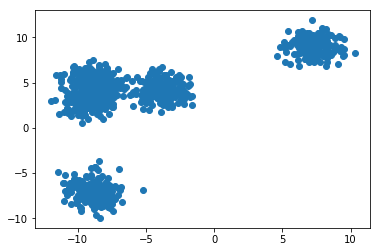

In [54]:
from sklearn.decomposition import PCA
def viz_pca(X,components=2):
    pca = PCA(n_components=2, whiten=True).fit(X)
    print('Orthogonal Vectors:',pca.components_,'\n')
    print('Variance Retained:',sum(pca.explained_variance_ratio_))
    X_pca = pca.transform(X)
    pyplot.scatter(X[:,0], X[:,1])  
    return X_pca

X_pca=viz_pca(df.values,components=2)
df.head()



In [55]:
from plotly.graph_objs import *
import sklearn

def plot_pca(df, X_values):
    kmeans_cluster=KMeans(n_clusters=10,random_state=1)
    X_matrix=np.matrix(X_values)
    kmeans_cluster.fit(X_matrix)
    labels=kmeans_cluster.labels_
    pca = sklearn.decomposition.PCA(n_components=2)
    pca.fit(df)
    new_matrix= pd.DataFrame(pca.transform(df))
    new_matrix.index = df.index
    new_matrix.columns=['x','y']
    new_matrix['labels']=labels

    labels=sorted(new_matrix.labels.unique())
    data=[]
    for i in labels:
        new_matrix_cluster=new_matrix[new_matrix.labels==i]
        data.append(go.Scattergl(x = new_matrix_cluster.x,y = new_matrix_cluster.y,
                                 mode='markers',
                                 text=[f'Label Name: {[i][0]}' for i in new_matrix_cluster.index],
                                 marker=dict(opacity=0.75),
                                 name='Cluster_'+str(i)))

    layout = go.Layout(title='PCA vs. Clusters',
        xaxis=dict(title='PCA1'),yaxis=dict(title='PCA2'),hovermode='closest')

    figure=go.Figure(data=data,layout=layout)
    py.iplot(figure)

In [56]:
plot_pca(df, df.iloc[:,:5])

### Visualize Tree

In [57]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier


def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    #classifier = RandomForestClassifier(n_estimators=10,random_state=0)
    #classifier = DecisionTreeClassifier(max_depth=depth,random_state=0)
    pca = PCA(n_components=2, whiten=True).fit(X)
    X = pca.transform(X)
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries (boolean) of the Decision Tree
    '''
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())


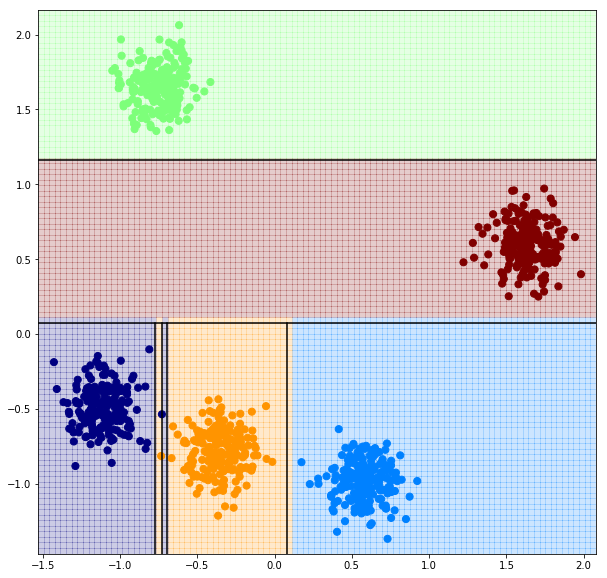

In [59]:
DTC = DecisionTreeClassifier(max_depth=7,random_state=0)
visualize_tree(DTC,X,y)

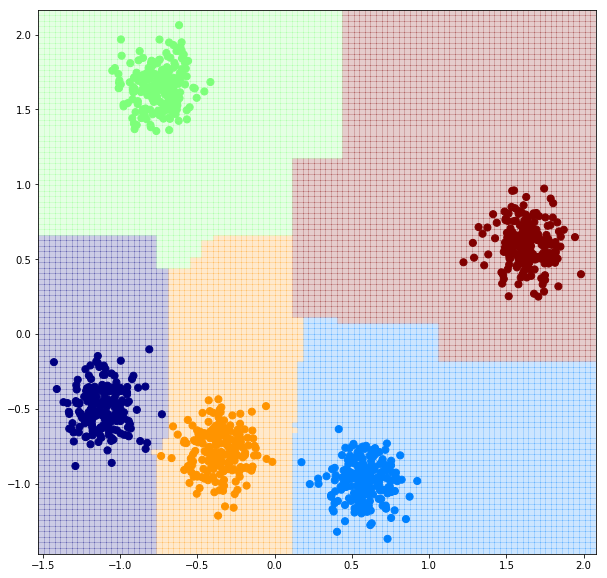

In [73]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=10,random_state=0)

# Get rid of boundaries to avoid error
visualize_tree(RFC,X,y,boundaries=False)

In [74]:
RFC

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [75]:
X.shape

(1000, 5)

In [82]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

def random_forest_metrics(df, X, y):
    classifier = RandomForestClassifier(n_estimators=10,random_state=0)
    classifier.fit(X,y)
    Accuracy=classifier.score(X, y)
    print('Accuracy:',Accuracy,'\n')

    importFeature = classifier.feature_importances_
    feature_importances=pd.DataFrame([importFeature])

    std = np.std([tree.feature_importances_ for tree in classifier.estimators_],axis=0)
    indices = np.argsort(importFeature)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importFeature[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    feature_importances=pd.DataFrame(pd.Series(df.columns)[indices])
    feature_importances['importance']=np.sort(importFeature)[::-1]
    feature_importances.columns=['features','importance']
    return feature_importances

Accuracy: 1.0 

Feature ranking:


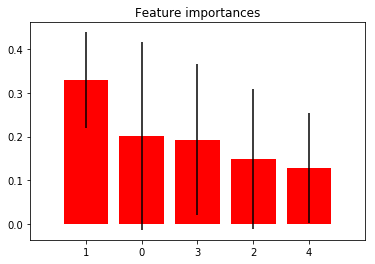

,features,importance
1,1,0.330040
0,0,0.201316
3,3,0.192723
2,2,0.148411
4,4,0.127509


In [83]:
random_forest_metrics(df,X, y)